<a href="https://colab.research.google.com/github/ranjiGT/Hitmonchan/blob/master/DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>***video link***</font> --> https://youtu.be/x89-G6gz3jg

<font color='pink'>***Softmax activation***</font> --> https://youtu.be/8xYsz2CyNUU
#<font color='redr'> ***DNN for training MNIST (Modified National Institute of Standards and Technology) dataset (Bundled with Keras)</font>*** 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

from keras.callbacks import EarlyStopping #For saving epochs
from keras.layers import BatchNormalization 

In [ ]:
#pip install tensorflow #upgrading to latest version of tf
print(tf.__version__)

In [ ]:
(trainX, trainY),(testX, testY) = mnist.load_data() #already split into train and test split

In [ ]:
trainX.shape

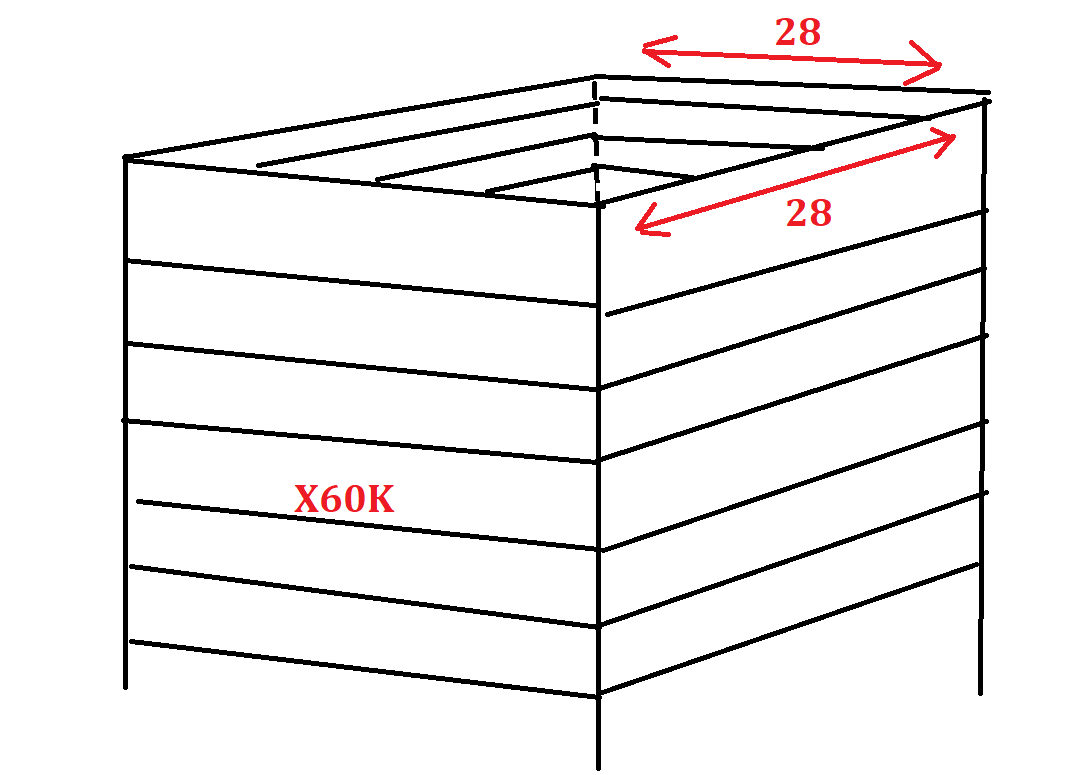

In [ ]:
plt.imshow(trainX[1], cmap='gray') #grayscle image; cmap = colormap in matplotlib

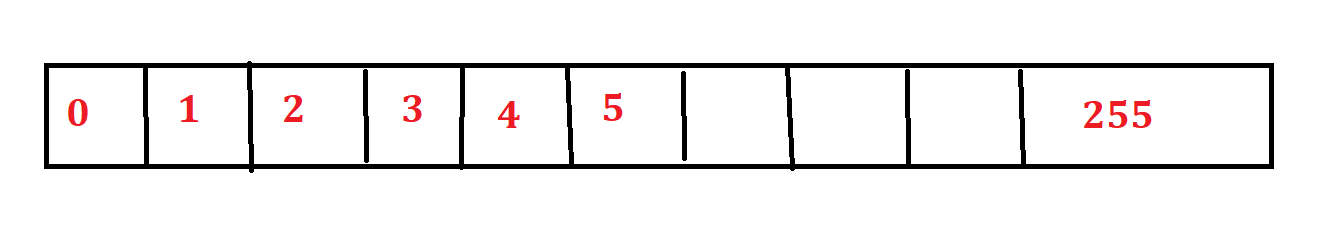

In [ ]:
trainY[:50]

In [ ]:
import pandas as pd
import numpy as np
L=pd.DataFrame(trainY)
L[0].value_counts()

In [ ]:
#reshaping ; converting 28x28 array of 784 input vector 
trainX = trainX.reshape(trainX.shape[0],784).astype('float32') #60K 784 elements
testX = testX.reshape(testX.shape[0],784).astype('float32')

In [ ]:
trainX.shape

In [ ]:
trainX/=255 #0 to 1 scale
testX/=255

<font color='orange'>***One hot-coding***</font>

In [ ]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

<font color='blue'>***Blue print***</font>

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(784, activation='relu')) # 1st layer
model.add(tf.keras.layers.Dense(100, activation='relu')) #2nd layer
model.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #categorical X entropy- as multiclass classification

In [ ]:
#epochs = 20
epochs = 10
#batchsize = 512
batchsize = 20000

In [ ]:
history = model.fit(trainX, trainY, batch_size=batchsize, epochs=epochs, validation_split=0.3, verbose=True) 

loss,accuracy = model.evaluate(testX, testY, verbose=False)

In [ ]:
print(history.history['val_accuracy']) #history captues accuracy scores on train , test and loss
print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy']) #training acc
va = pd.DataFrame(history.history['val_accuracy']) #validation acc

tva = pd.concat([ta,va], axis=1)
tva.boxplot()

In [ ]:
loss, acc = model.evaluate(trainX, trainY ,verbose=False)
print('Train accuracy: %.3f' %acc)

In [ ]:
loss, acc = model.evaluate(testX ,testY ,verbose=False) #verbose for showing the log
print('Test accuracy: %.3f' %acc) # %.3f for precision of the values

In [ ]:
rounded_predictions = model.predict_classes(testX, batch_size=512, verbose=False)
rounded_predictions[15]

In [ ]:
testY[15] #still in OHC

In [ ]:
rounded_labels=np.argmax(testY, axis=1)
rounded_labels[15]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

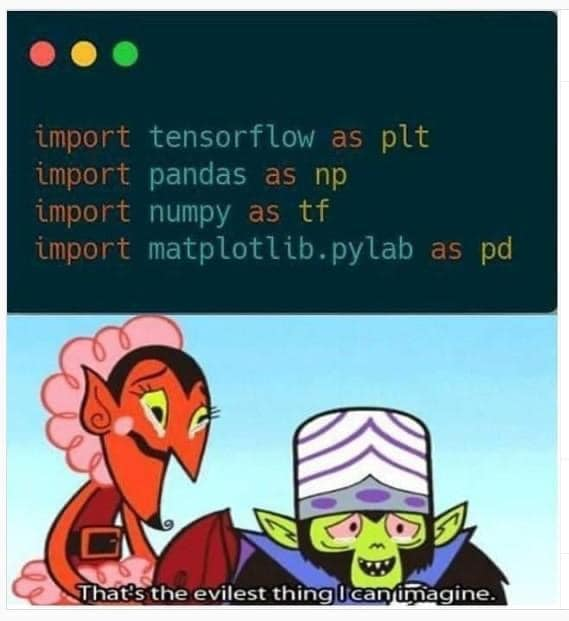